<a href="https://colab.research.google.com/github/rommeldg/hello-world/blob/master/Movie_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('drive/MyDrive/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.shape

(8807, 12)

In [5]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [6]:
# percentage of null values per column
df.isnull().sum()/df.shape[0]*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

In [7]:
# Replace null values in director, cast and country
df['director'].replace(np.nan, 'None',inplace  = True)
df['cast'].replace(np.nan, 'None',inplace  = True)
df['country'].replace(np.nan, 'None',inplace  = True)

In [8]:
# concatenate important columns into one string
df['Tags'] = df['type'] + ' ' + df['title'] + ' ' + df['director'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['listed_in'] + ' ' + df['description']
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Tags
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,None,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",Movie Dick Johnson Is Dead Kirsten Johnson Non...
1,s2,TV Show,Blood & Water,None,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...","TV Show Blood & Water None Ama Qamata, Khosi N..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",None,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,TV Show Ganglands Julien Leclercq Sami Bouajil...


In [9]:
# percentage of null values per column Aafter null replace
df.isnull().sum()/df.shape[0]*100

show_id         0.000000
type            0.000000
title           0.000000
director        0.000000
cast            0.000000
country         0.000000
date_added      0.113546
release_year    0.000000
rating          0.045418
duration        0.034064
listed_in       0.000000
description     0.000000
Tags            0.000000
dtype: float64

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

Movie      6131
TV Show    2676
Name: type, dtype: int64


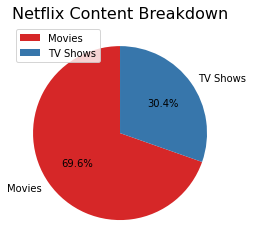

In [11]:
labels = 'Movies','TV Shows'
x = pd.Series(df['type'])
y = x.value_counts()
print(y)
fig1, ax1 = plt.subplots()
ax1.pie(y, labels=labels, autopct='%1.1f%%',startangle = 90, colors=['#d62728','#3776ab' ])
plt.title('Netflix Content Breakdown', fontsize = 16)
plt.legend()
plt.show()

In [12]:
df['release_year'].value_counts().head(10)

2018    1147
2017    1032
2019    1030
2020     953
2016     902
2021     592
2015     560
2014     352
2013     288
2012     237
Name: release_year, dtype: int64

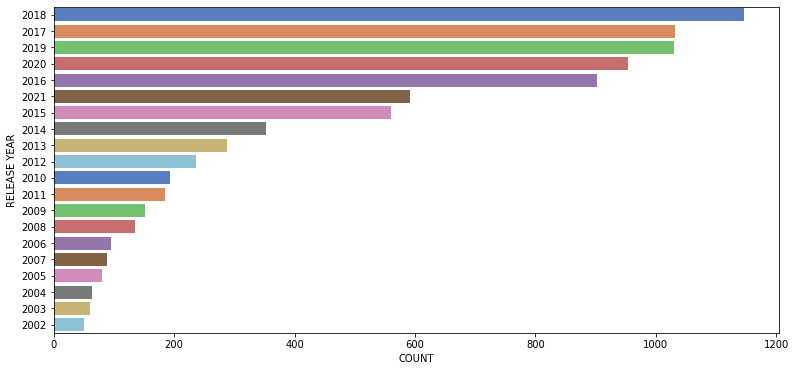

In [13]:
plt.figure(figsize=(13,6))
sns.countplot(y='release_year', data=df, palette="muted", order=df['release_year'].value_counts().index[:20])
sns.set_style("darkgrid")
plt.xlabel('COUNT')
plt.ylabel('RELEASE YEAR')
plt.show()

In [14]:
#from nltk library - stem the words
ps=PorterStemmer()

In [15]:
def stem(text):
    x=[]
    
    for i in text.split():
        x.append(ps.stem(i))
    return " ".join(x)

In [16]:
# apply stemmer function to new concatenated column
for i,row in df.iterrows():
    df.loc[i, 'Tags'] = stem(row['Tags'])  

In [17]:
cv = CountVectorizer(max_features=5000,stop_words='english')
vectors = cv.fit_transform(df['Tags']).toarray()

In [18]:
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
vectors[0]

array([0, 0, 0, ..., 0, 0, 0])

In [20]:
# add ; to suppress output
cv.get_feature_names();

In [21]:
similarity = cosine_similarity(vectors)

In [22]:
similarity[0]

array([1.        , 0.        , 0.09658906, ..., 0.12777531, 0.11952286,
       0.22934124])

In [23]:
df[df['title'].str.contains("Jaws")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Tags
41,s42,Movie,Jaws,Steven Spielberg,"Roy Scheider, Robert Shaw, Richard Dreyfuss, L...",United States,"September 16, 2021",1975,PG,124 min,"Action & Adventure, Classic Movies, Dramas",When an insatiable great white shark terrorize...,"movi jaw steven spielberg roy scheider, robert..."
42,s43,Movie,Jaws 2,Jeannot Szwarc,"Roy Scheider, Lorraine Gary, Murray Hamilton, ...",United States,"September 16, 2021",1978,PG,116 min,"Dramas, Horror Movies, Thrillers",Four years after the last deadly shark attacks...,"movi jaw 2 jeannot szwarc roy scheider, lorrai..."
43,s44,Movie,Jaws 3,Joe Alves,"Dennis Quaid, Bess Armstrong, Simon MacCorkind...",United States,"September 16, 2021",1983,PG,98 min,"Action & Adventure, Horror Movies, Thrillers",After the staff of a marine theme park try to ...,"movi jaw 3 joe alv denni quaid, bess armstrong..."
44,s45,Movie,Jaws: The Revenge,Joseph Sargent,"Lorraine Gary, Lance Guest, Mario Van Peebles,...",United States,"September 16, 2021",1987,PG-13,91 min,"Action & Adventure, Horror Movies, Thrillers","After another deadly shark attack, Ellen Brody...",movi jaws: the reveng joseph sargent lorrain g...


In [24]:
# added ; to suppress output
sorted(similarity[41]);

In [25]:
%%capture
for count, value in enumerate(similarity[41]):
        print(count, value)

In [26]:
# added ; to suppress output
list(enumerate(similarity[41]));

In [27]:
# added ; to suppress output
sorted(list(enumerate(similarity[41])),reverse=True);

In [28]:
# added ; to suppress output
sorted(list(enumerate(similarity[41])),reverse=True, key=lambda x:x[1]);

In [29]:
def recommend(movie):
     
    movie_list = df[df['title'].str.contains(movie)] 
     
    if len(movie_list):
        movie_idx = movie_list.index[0]
        distances = similarity[movie_idx] 
                                        
        
        movies_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:11]       
            
        
        print('Recommendations for {0} :\n'.format(movie_list.iloc[0]['title']))
        for i in movies_list: 
            print(df.iloc[i[0]].title)
    
    else:
        return "No movies found.  Please check your input" 

In [30]:
recommend('Jaws')

Recommendations for Jaws :

Jaws 2
Jaws: The Revenge
Indiana Jones and the Temple of Doom
Jaws 3
Mutiny on the Bounty
In The Deep
Midnight Run
Superfly
Tremors: Shrieker Island
Indiana Jones and the Last Crusade


In [31]:
list_of_titles=df['title'].tolist()
num_titles = len(list_of_titles)

In [32]:
# Step 2: select some random titles
num_samples = 30
random_indices = np.random.choice(num_titles, size=num_samples, replace=False)  # Random indicies in [0, 1, ..., num_titles]

In [33]:
random_titles = []
for index in random_indices:
    random_titles.append(list_of_titles[index])

In [34]:
random_indices

array([1098, 6426, 5638, 8295, 3421, 3077, 4920, 4739,  779, 3368, 5727,
       3454, 8294, 2616, 7964, 6591, 4042, 7053, 6400, 1607, 4935,  417,
       4567, 1662, 5221, 2453, 7048, 1964, 7318, 3438])

In [35]:
print(random_titles)

['Mandela', 'Case Closed', 'Very Big Shot', 'The Feels', 'Sinister 2', 'Aaviri', 'Dude', 'Being Napoleon', 'Battlefield Earth', 'A Little Thing Called First Love', 'Inborn Pair', 'Rotten', 'The Fear of 13', 'Görümce', 'Searching for Bobby Fischer', 'Democrats', 'American Crime Story: The People v. O.J. Simpson', 'Ideachi Kalpana', 'Caida del Cielo', 'Hazel Brugger: Tropical', 'Amateur', 'Chhota Bheem in African Safari', 'Haani', 'The Suit', 'West Coast Customs', 'Revolutionary Love', "I'll See You in My Dreams", 'High & Low The Movie', 'Little Singham Bandarpur Mein Hu Ha Hu', 'After']


# New Section

In [36]:
def recommend(movie):
     
    movie_list = df[df['title'].str.contains(movie)] 
     
    if len(movie_list):
        movie_idx = movie_list.index[0]
        distances = similarity[movie_idx] 
                                        
        
        movies_list = sorted(list(enumerate(distances)),reverse=True, key=lambda x:x[1])[1:11]     
        score_cutoff = 0.27
        good_movies_list = []
        for index, score in movies_list:
            if score > score_cutoff:
                good_movies_list.append( (index, score) )
            
        
        print('Recommendations for {0} :\n'.format(movie_list.iloc[0]['title']))
        for i in good_movies_list: 
            print(f'Movie: {df.iloc[i[0]].title}  Score: {i[1]}') # Print title and score
    
    else:
        return "No movies found.  Please check your input" 

In [37]:
random_indices

array([1098, 6426, 5638, 8295, 3421, 3077, 4920, 4739,  779, 3368, 5727,
       3454, 8294, 2616, 7964, 6591, 4042, 7053, 6400, 1607, 4935,  417,
       4567, 1662, 5221, 2453, 7048, 1964, 7318, 3438])

In [38]:
recommend('Jaws')

Recommendations for Jaws :

Movie: Jaws 2  Score: 0.4932200252078107
Movie: Jaws: The Revenge  Score: 0.38888888888888895
Movie: Indiana Jones and the Temple of Doom  Score: 0.282842712474619
Movie: Jaws 3  Score: 0.2777777777777778
Movie: Mutiny on the Bounty  Score: 0.2777777777777778
Movie: In The Deep  Score: 0.27399831217559545
Movie: Midnight Run  Score: 0.27031025295064476


In [39]:
print(random_titles)

['Mandela', 'Case Closed', 'Very Big Shot', 'The Feels', 'Sinister 2', 'Aaviri', 'Dude', 'Being Napoleon', 'Battlefield Earth', 'A Little Thing Called First Love', 'Inborn Pair', 'Rotten', 'The Fear of 13', 'Görümce', 'Searching for Bobby Fischer', 'Democrats', 'American Crime Story: The People v. O.J. Simpson', 'Ideachi Kalpana', 'Caida del Cielo', 'Hazel Brugger: Tropical', 'Amateur', 'Chhota Bheem in African Safari', 'Haani', 'The Suit', 'West Coast Customs', 'Revolutionary Love', "I'll See You in My Dreams", 'High & Low The Movie', 'Little Singham Bandarpur Mein Hu Ha Hu', 'After']


In [40]:
recommend('Mandela')

Recommendations for Mandela :

Movie: Irada Pakka  Score: 0.41962716370814124
Movie: Aata Pita  Score: 0.4095141796739611
Movie: Babamın Ceketi  Score: 0.4045773899393389
Movie: Adhugo  Score: 0.4045773899393389
Movie: Hombanna  Score: 0.4045773899393389
Movie: Merku Thodarchi Malai  Score: 0.39130434782608703
Movie: Jatt James Bond  Score: 0.39130434782608703
Movie: AK vs AK  Score: 0.38720154633118314
Movie: Pahuna  Score: 0.38306543884143696
Movie: Motichoor Chaknachoor  Score: 0.38306543884143696


In [44]:
recommend('American Crime Story: The People v. O.J. Simpson')

Recommendations for American Crime Story: The People v. O.J. Simpson :

Movie: Unsolved  Score: 0.4892748924933745
Movie: Exhibit A  Score: 0.4714770836361918
Movie: The Confession Tapes  Score: 0.4635235823621443
Movie: Get Shorty  Score: 0.4567501391955698
Movie: American Crime  Score: 0.4426338948728194
Movie: The Good Cop  Score: 0.4317328917763455
Movie: Trial By Media  Score: 0.42958889136137857
Movie: Father Brown  Score: 0.42709927780721924
Movie: The Assassination of Gianni Versace  Score: 0.4254814716983816
Movie: I AM A KILLER  Score: 0.42449996757292036


In [42]:
recommend('Being Napoleon')

Recommendations for Being Napoleon :

Movie: Why We Fight: The Battle of Russia  Score: 0.39999999999999997
Movie: Prelude to War  Score: 0.3731012536223182
Movie: Heroin(e)  Score: 0.34412360080584264
Movie: AlphaGo  Score: 0.33407655239053047
Movie: Being Elmo: A Puppeteer's Journey  Score: 0.32496684180984076
Movie: Tread  Score: 0.32274861218395134
Movie: Silicon Cowboys  Score: 0.32274861218395134
Movie: Unknown  Score: 0.31622776601683794
Movie: The Last Blockbuster  Score: 0.3125
Movie: Human Nature  Score: 0.3125


In [43]:
recommend('Searching for Bobby Fischer')

Recommendations for Searching for Bobby Fischer :

Movie: Osmosis Jones  Score: 0.37670528747840887
Movie: Hachi: A Dog's Tale  Score: 0.3594473161741678
Movie: The Karate Kid  Score: 0.3383764840919799
Movie: Indiana Jones and the Last Crusade  Score: 0.3346580611898702
Movie: Canvas  Score: 0.33129457822453967
Movie: The Water Man  Score: 0.31707317073170743
Movie: The Breadwinner  Score: 0.3170731707317073
Movie: Get Santa  Score: 0.3167782064090728
Movie: The Boy Who Harnessed the Wind  Score: 0.31234752377721214
Movie: The Boy in the Striped Pajamas  Score: 0.31234752377721214


In [45]:
recommend('Gunshot')

Recommendations for Gunshot :

Movie: Sorry To Disturb  Score: 0.5442477655948227
Movie: Son Of Adam  Score: 0.5325179035528812
Movie: An Hour and a Half  Score: 0.5262013605584339
Movie: 678  Score: 0.5135717874467444
Movie: اشتباك  Score: 0.5022831168966869
Movie: الف مبروك  Score: 0.5006261743217588
Movie: Boushkash  Score: 0.4953090647358553
Movie: El-Khawaga's Dilemma  Score: 0.4905114715879727
Movie: The Dealer  Score: 0.4800426723563985
Movie: Asmaa  Score: 0.46169025843831946


In [46]:
recommend('Hollywood')

Recommendations for Palermo Hollywood :

Movie: From Stress to Happiness  Score: 0.3670651741928988
Movie: Here and There  Score: 0.3411211461689767
Movie: Match  Score: 0.3411211461689767
Movie: AK vs AK  Score: 0.33425160871869336
Movie: Si Doel the Movie 2  Score: 0.3265986323710905
Movie: Highway  Score: 0.32118202741878643
Movie: Si Doel the Movie  Score: 0.32
Movie: Confusion Na Wa  Score: 0.31819805153394637
Movie: Haapus  Score: 0.31304951684997057
Movie: Alarmoty in the Land of Fire  Score: 0.30983866769659335


In [47]:
recommend('Dave Chappelle: Equanimity & The Bird Revelation')

Recommendations for Dave Chappelle: Equanimity & The Bird Revelation :

Movie: Dave Chappelle  Score: 0.7872340425531916
Movie: Dave Chappelle: Sticks & Stones  Score: 0.6287550204746953
Movie: Chappelle's Show  Score: 0.6007360460751543
Movie: Bumping Mics with Jeff Ross & Dave Attell  Score: 0.5626221100633074
Movie: The Honeymoon Stand Up Special  Score: 0.5414961542858665
Movie: Queens of Comedy  Score: 0.5205733767083311
Movie: Chelsea  Score: 0.5170542049716025
Movie: Schulz Saves America  Score: 0.5052911526399114
Movie: The Comedy Lineup  Score: 0.49508219820422084
Movie: The Degenerates  Score: 0.48992509197292683


In [48]:
recommend('7SEEDS')

Recommendations for 7SEEDS :

Movie: High-Rise Invasion  Score: 0.40754719379251503
Movie: K  Score: 0.37674325988790797
Movie: Magi: Adventure of Sinbad  Score: 0.35701357669110867
Movie: JoJo's Bizarre Adventure  Score: 0.35197257645717206
Movie: Cyborg 009: Call of Justice  Score: 0.3478041718201262
Movie: One-Punch Man  Score: 0.33866700533384136
Movie: Gargantia on the Verdurous Planet  Score: 0.3201043473133104
Movie: AJIN: Demi-Human  Score: 0.31430927854685603
Movie: Blue Exorcist  Score: 0.3053290134455174
Movie: Violet Evergarden: Special  Score: 0.3050444380432816


In [49]:
recommend('Funny Boy')

Recommendations for Funny Boy :

Movie: The Breadwinner  Score: 0.3748170285326546
Movie: Bwakaw  Score: 0.35355339059327373
Movie: Pray Away  Score: 0.34914862437758787
Movie: Saturday Church  Score: 0.3478505426185218
Movie: The Boy in the Striped Pajamas  Score: 0.34285714285714286
Movie: All In My Family  Score: 0.3401680257083045
Movie: A Separation  Score: 0.3336230624913197
Movie: Q Ball  Score: 0.3265986323710905
Movie: Feminists: What Were They Thinking?  Score: 0.32659863237109044
Movie: Moonlight  Score: 0.32444284226152514


In [50]:
recommend('Barney and Friends')

Recommendations for Barney and Friends :

Movie: The Wiggles  Score: 0.40249223594996214
Movie: Pororo - The Little Penguin  Score: 0.3922322702763681
Movie: JingleKids  Score: 0.38805700005813276
Movie: The InBESTigators  Score: 0.3779644730092272
Movie: Cupcake & Dino - General Services  Score: 0.3748170285326546
Movie: Qurious Como  Score: 0.3741657386773942
Movie: DreamWorks Spooky Stories: Volume 2  Score: 0.37186787208054733
Movie: Loo Loo Kids: Johny & Friends Musical Adventures  Score: 0.3718678720805473
Movie: Larva  Score: 0.3713906763541037
Movie: Sunny Bunnies  Score: 0.3713906763541037


In [51]:
recommend('Talladega Nights: The Ballad of Ricky Bobby')

Recommendations for Talladega Nights: The Ballad of Ricky Bobby :

Movie: Ricky Gervais: Humanity  Score: 0.32338083338177726
Movie: Triumph of the Heart  Score: 0.307697694415248
Movie: Bobby Robson: More Than a Manager  Score: 0.3061618117884868
Movie: Zion  Score: 0.29197858123689185
Movie: Stripes  Score: 0.287824837800531
Movie: Best of the Best  Score: 0.28429311094645204
Movie: Private Life  Score: 0.28005601680560194
Movie: In the Line of Fire  Score: 0.2772413120334688
Movie: Mosul  Score: 0.2766475001553213
Movie: Through My Father's Eyes: The Ronda Rousey Story  Score: 0.27500954910846337


In [52]:
recommend('Mission Control: The Unsung Heroes of Apollo')

Recommendations for Mission Control: The Unsung Heroes of Apollo :

Movie: Coded Bias  Score: 0.4522670168666454
Movie: The Reason I Jump  Score: 0.44232586846469146
Movie: E-Cigarettes: Miracle or Menace?  Score: 0.44194173824159216
Movie: Catching the Sun  Score: 0.4330127018922194
Movie: House of Z  Score: 0.4160251471689219
Movie: He Named Me Malala  Score: 0.41457809879442487
Movie: The Legend of 420  Score: 0.3977475644174329
Movie: Final Account  Score: 0.3969283100678678
Movie: What Makes a Psychopath?  Score: 0.3952847075210474
Movie: Rize  Score: 0.39391929857916763


In [53]:
recommend('Mindhorn')

Recommendations for Mindhorn :

Movie: The Death of Stalin  Score: 0.3304135690539768
Movie: Philomena  Score: 0.31234752377721214
Movie: The Professor and the Madman  Score: 0.31234752377721214
Movie: Brahman Naman  Score: 0.30949223029508643
Movie: Pelé  Score: 0.30618621784789724
Movie: A Serious Man  Score: 0.3055555555555556
Movie: Room on the Broom  Score: 0.30429030972509225
Movie: Scary Movie 5  Score: 0.29814239699997197
Movie: My Scientology Movie  Score: 0.2981423969999719
Movie: Four Weddings and a Funeral  Score: 0.2898754521821015


In [54]:
recommend('Familiar Wife')

Recommendations for Familiar Wife :

Movie: Twice Upon A Time  Score: 0.6239191249502211
Movie: 100 Days My Prince  Score: 0.6003970880646445
Movie: Nevertheless,  Score: 0.5865241094231511
Movie: Cain and Abel  Score: 0.5837823967819284
Movie: Lovestruck in the City  Score: 0.5803781951158349
Movie: One Spring Night  Score: 0.5746204653902288
Movie: Momo Salon  Score: 0.5646839155919903
Movie: Cinta Iris  Score: 0.5645484402214311
Movie: Chocolate  Score: 0.5640093857576964
Movie: My First First Love  Score: 0.5640093857576964


In [ ]:
recommend('Jim Gaffigan: Beyond the Pale')

Recommendations for Jim Gaffigan: Beyond the Pale :

Movie: Jim Gaffigan: Mr. Universe  Score: 0.7286120888626996
Movie: Jim Gaffigan: Obsessed  Score: 0.7205561941158012
Movie: Jim Gaffigan: King Baby  Score: 0.7149966407987077
Movie: Jim Gaffigan: Cinco  Score: 0.7096774193548387
Movie: Jim Jefferies: Freedumb  Score: 0.5430753866417046
Movie: Jim Jefferies: This Is Me Now  Score: 0.5220925637866243
Movie: Jim Jefferies: Intolerant  Score: 0.5095101710852534
Movie: Jim Jefferies : BARE  Score: 0.5091331749765979
Movie: Jim & Andy: The Great Beyond - Featuring a Very Special, Contractually Obligated Mention of Tony Clifton  Score: 0.43357427487729555
Movie: Jim Norton: Mouthful of Shame  Score: 0.43122877254358816


In [ ]:
recommend('Marco Polo')

Recommendations for Marco Polo :

Movie: October Faction  Score: 0.39177339695010327
Movie: Footprints in the Sand  Score: 0.3840122885898554
Movie: Shooter  Score: 0.378489059622558
Movie: Wynonna Earp  Score: 0.3756527420083571
Movie: L.A.’s Finest  Score: 0.37346855888918484
Movie: Thieves of the Wood  Score: 0.3721936841593884
Movie: Van Helsing  Score: 0.3711537444790452
Movie: Iron Ladies  Score: 0.36847776333038806
Movie: Lupin  Score: 0.3626203338114211
Movie: The Mole  Score: 0.3614031611621005


In [ ]:
recommend('Squid Game')

Recommendations for Squid Game :

Movie: Prison Playbook  Score: 0.5488516997650299
Movie: Chief of Staff  Score: 0.5301340666313609
Movie: Color of Woman  Score: 0.5291612750491621
Movie: The K2  Score: 0.5241454151643895
Movie: Persona  Score: 0.5222329678670935
Movie: Romance is a bonus book  Score: 0.5190990940695904
Movie: Hospital Playlist  Score: 0.5112895332090217
Movie: Memories of the Alhambra  Score: 0.5077524002897476
Movie: Bad Guys: Vile City  Score: 0.5049927816941189
Movie: My Sassy Girl  Score: 0.503831473655779


In [ ]:
recommend('30 Rock')

Recommendations for 30 Rock :

Movie: I'm Sorry  Score: 0.3588891627327475
Movie: Netflix Presents: The Characters  Score: 0.35606417318210487
Movie: The Who Was? Show  Score: 0.3509885473947302
Movie: Comedy Premium League  Score: 0.345834250622541
Movie: Hot Date  Score: 0.3424150435005797
Movie: The Break with Michelle Wolf  Score: 0.33510052044720356
Movie: Monty Python's Personal Best  Score: 0.3320388300611682
Movie: Episodes  Score: 0.3304135690539768
Movie: Green Eggs and Ham  Score: 0.3292447425930007
Movie: Frasier  Score: 0.32867462139886605
